In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 2.4 MB/s 
     |████████████████████████████████| 448 kB 49.2 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   215k      0 --:--:-- --:--:-- --:--:--  215k


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  71.2M      0 --:--:-- --:--:-- --:--:-- 71.0M


In [19]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


 regular expression(정규 표현식)

- https://regexr.com/

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [9]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [12]:
from sklearn.model_selection import train_test_split

In [25]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [26]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data, y_data)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150000,), (50000,), (150000,), (50000,))

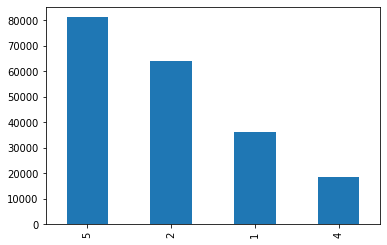

In [27]:
y_data.value_counts().plot(kind='bar')
# 3이 빠져있고, 한쪽(5)으로 쏠려있는 형태
# 빠진 데이터는 채워 넣고, 쏠린 데이터는 밸런스를 맞추어야 함 --> SMOTE 활용

SMTP로 데이터 불균형 처리

- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

- https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

- https://john-analyst.medium.com/smote%EB%A1%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%88%EA%B7%A0%ED%98%95-%ED%95%B4%EA%B2%B0%ED%95%98%EA%B8%B0-5ab674ef0b32

# NLP

In [20]:
# x_train.str,replace('[가-힣ㄱ-ㅎㅠ]'.'')

In [21]:
from konlpy.tag import Mecab

In [28]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [29]:
x_train_small = x_train[0:5000]

In [ ]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence


# Tokenizer

In [38]:
print(sentence)

[['머리카락', '편', '인데', '.', '..', '잘', '안', '되', '네요', '.', '..', 'ㅠㅠ', '앞머리', '만', '거', '라서', '2', '번', '시도', '해', '봤', '는데', '2', '번', '째', '시간', '좀', '넉넉히', '주', '머리카락', '늘리', '것', '제대로', '확인', '해', '봤', '느', '데', '안', '되', '었', '어요', '.', '..', 'ㅠㅠ'], ['배송', '빠르', '다양', '색', '저렴', '해서', '좋', '아요', '~'], ['포장', '상태', '엉망', '였', '어요'], ['네일', '패디', '모두', '구입', '해', '봤', '는데', '네일', '하루', '못', '갔', '습니다', '.', '제', '붙이', '방법', '실패', '건지', '…', '패디', '훌륭', '합니다', '.'], ['화질', '저', '가랑', '달라요', 'ㅋㅋ'], ['아니', '아무리', '유심', '전달', '점', '라', '해도', '공항', '에서', '말', '톡', '어', '플', '깔', '아야', '한단', '건', '말', '해', '주', '면', '안', '되', '나요', '?', '??', '전달', '후', '알', '아', '읽', '어라', '현지', '서', '끼워', '라고', '어', '플', '안', '깔', '갔', '다가', '낭패', 'ㅡㅡ', '와이파이', '찾', '아', '까', '법', '난감', '해외', '에서', '낭패', '담', '엔', '해', '봤으니', '알', '아서', '잘', '할께요'], ['튼튼', '좋', '아요', '!', '길이', '조금', '짧', '아서', '아쉽', '지만', '대체', '적', '으로', '만족', '합', '니', '당'], ['별로', '에요', '.', '비닐', '넘', '얇', ',', '내', '구성', '약해', '보여요

In [34]:
import tensorflow as tf

In [35]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

In [36]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '있': 8,
 '구매': 9,
 '안': 10,
 '배송': 11,
 '습니다': 12,
 '너무': 13,
 '했': 14,
 '같': 15,
 '어': 16,
 '먹': 17,
 '거': 18,
 '되': 19,
 '~': 20,
 '합니다': 21,
 '!': 22,
 '기': 23,
 '재': 24,
 '쓰': 25,
 '요': 26,
 '않': 27,
 '아': 28,
 '..': 29,
 '나': 30,
 '없': 31,
 '았': 32,
 '사용': 33,
 '로': 34,
 '것': 35,
 '겠': 36,
 '해서': 37,
 '서': 38,
 '그냥': 39,
 '만': 40,
 '었': 41,
 '으로': 42,
 '지만': 43,
 '보': 44,
 '보다': 45,
 '좀': 46,
 '주': 47,
 '해': 48,
 '입니다': 49,
 '제품': 50,
 '해요': 51,
 '만족': 52,
 '아서': 53,
 '가격': 54,
 '면': 55,
 '어서': 56,
 ',': 57,
 '주문': 58,
 '개': 59,
 '생각': 60,
 '니': 61,
 '라': 62,
 '받': 63,
 '할': 64,
 '맛': 65,
 '더': 66,
 '사': 67,
 '빠르': 68,
 '많이': 69,
 '때': 70,
 '왔': 71,
 '에서': 72,
 '작': 73,
 '음': 74,
 '사이즈': 75,
 '포장': 76,
 '시': 77,
 '샀': 78,
 '수': 79,
 '두': 80,
 '번': 81,
 'ㅠㅠ': 82,
 '별로': 83,
 '맛있': 84,
 '정말': 85,
 '^^': 86,
 '던': 87,
 '냄새': 88,
 '?': 89,
 '일': 90,
 '맞': 91,
 '다른': 92,
 '입': 93,
 '괜찮': 94,
 '2': 95,
 '1': 96,
 '못': 9

In [ ]:
tokenizer.word_counts

In [40]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value   # 전체 단어 수
  if(value <=2):
    rare_cnt = rare_cnt + 1 # rare_cnt =+ 1
    rare_freq = rare_freq + value   # 2미만인 단어 수


In [43]:
total_cnt, rare_cnt, (rare_cnt / total_cnt)*100, (rare_freq/total_freq)*100

(8056, 5270, 65.4170804369414, 7.633224173861268)

In [45]:
vocab_size = total_cnt - rare_cnt

OOV(Out-Of-Vocabulary)

- https://stackoverflow.com/questions/45495190/initializing-out-of-vocabulary-oov-tokens

- https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html

In [48]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [49]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '있',
 10: '구매',
 11: '안',
 12: '배송',
 13: '습니다',
 14: '너무',
 15: '했',
 16: '같',
 17: '어',
 18: '먹',
 19: '거',
 20: '되',
 21: '~',
 22: '합니다',
 23: '!',
 24: '기',
 25: '재',
 26: '쓰',
 27: '요',
 28: '않',
 29: '아',
 30: '..',
 31: '나',
 32: '없',
 33: '았',
 34: '사용',
 35: '로',
 36: '것',
 37: '겠',
 38: '해서',
 39: '서',
 40: '그냥',
 41: '만',
 42: '었',
 43: '으로',
 44: '지만',
 45: '보',
 46: '보다',
 47: '좀',
 48: '주',
 49: '해',
 50: '입니다',
 51: '제품',
 52: '해요',
 53: '만족',
 54: '아서',
 55: '가격',
 56: '면',
 57: '어서',
 58: ',',
 59: '주문',
 60: '개',
 61: '생각',
 62: '니',
 63: '라',
 64: '받',
 65: '할',
 66: '맛',
 67: '더',
 68: '사',
 69: '빠르',
 70: '많이',
 71: '때',
 72: '왔',
 73: '에서',
 74: '작',
 75: '음',
 76: '사이즈',
 77: '포장',
 78: '시',
 79: '샀',
 80: '수',
 81: '두',
 82: '번',
 83: 'ㅠㅠ',
 84: '별로',
 85: '맛있',
 86: '정말',
 87: '^^',
 88: '던',
 89: '냄새',
 90: '?',
 91: '일',
 92: '맞',
 93: '다른',
 94: '입',
 95: '괜찮',
 96: '2',
 97: 

In [50]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [52]:
print(x_train_small[0:3])

[[829, 331, 106, 2, 30, 8, 11, 20, 3, 2, 30, 83, 1, 41, 19, 302, 96, 82, 1570, 49, 143, 6, 96, 82, 202, 224, 47, 2201, 48, 829, 1, 36, 485, 231, 49, 143, 1141, 108, 11, 20, 42, 5, 2, 30, 83], [12, 69, 1045, 214, 107, 38, 4, 7, 21], [77, 175, 553, 232, 5]]


In [55]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(45, 5, 6)

In [57]:
hist_len = [len(words) for words in x_train_small]

(array([ 17.,  55., 148., 641., 328., 328., 575., 221., 211., 321., 152.,
        116., 227.,  88., 100., 185.,  90.,  89., 145.,  77.,  68., 106.,
         50.,  32.,  41.,  78.,  39.,  37.,  64.,  38.,  29.,  66.,  28.,
         29.,  50.,  18.,  12.,  24.,  17.,  10.,  12.,   9.,   6.,   8.,
          2.,   3.,   5.,   1.,   2.,   2.]),
 array([ 1.  ,  2.32,  3.64,  4.96,  6.28,  7.6 ,  8.92, 10.24, 11.56,
        12.88, 14.2 , 15.52, 16.84, 18.16, 19.48, 20.8 , 22.12, 23.44,
        24.76, 26.08, 27.4 , 28.72, 30.04, 31.36, 32.68, 34.  , 35.32,
        36.64, 37.96, 39.28, 40.6 , 41.92, 43.24, 44.56, 45.88, 47.2 ,
        48.52, 49.84, 51.16, 52.48, 53.8 , 55.12, 56.44, 57.76, 59.08,
        60.4 , 61.72, 63.04, 64.36, 65.68, 67.  ]),
 <a list of 50 Patch objects>)

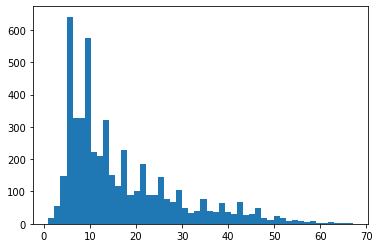

In [58]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [61]:
sum(hist_len) / len(x_train_small)
# 너무 많은 값이 잘려나가기 때문에 채우는 방법으로 선회

16.795

In [62]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [63]:
y_train_small = y_train[0:5000]

In [64]:
import numpy as np
np.unique(y_train_small)

array([1, 2, 4, 5])

# make model

In [68]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50))     # input layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))     # hidden layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))     # output layer

model.compile(optimizer='adam', loss='sparse_categorial_crossentropy', metrics=['acc'])     # gadget

In [ ]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)